# Setup

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# Utils

In [2]:
def add_labels(ax, offset=0, color='black', fontsize=10):
  for container in ax.containers:
    for bar in container:
      height = bar.get_height()
      if height == 0:
        continue
      ax.text(
        bar.get_x() + bar.get_width() / 2.,
        height + offset,
        f'{int(height)}',
        ha='center',
        color=color,
        fontsize=fontsize
      )

# Load data

In [3]:
final_df = pd.read_csv(f"./after_meeting.csv", encoding='utf-8')
final_df.head()

,document,paragraph_index,original_text,simplified_text,q1,q2,q3,q3_1,q4,q5
0,99bdc9fdd8097f067f77cb220074b1b5,1,Le presenti Linee programmatiche definiscono g...,Questo documento stabilisce le direzioni princ...,True,False,False,NaN,False,Mantenere gli acronimi delle strutture potrebb...
1,99bdc9fdd8097f067f77cb220074b1b5,2,"La situazione demografica, sanitaria, socio-ec...","La situazione in Basilicata, come in tutto il ...",True,False,False,NaN,False,NaN
2,99bdc9fdd8097f067f77cb220074b1b5,3,L'analisi di contesto della popolazione reside...,L'analisi della popolazione che vive in Basili...,True,False,False,NaN,False,"""percentuale uguale"" non è propriamente sinoni..."
3,99bdc9fdd8097f067f77cb220074b1b5,4,La Basilicata ha una superficie di 10.073 kmq ...,La Basilicata copre un'area di 10.073 km² e ha...,True,False,False,NaN,False,"Anche in questo caso il linguaggio ""semplifica..."
4,99bdc9fdd8097f067f77cb220074b1b5,5,Molto interessante è l'aspetto della tendenza ...,"Negli ultimi 70 anni, alcune aree del territor...",True,False,False,NaN,False,NaN


# Q1 - Sono presenti tutte le informazioni essenziali?

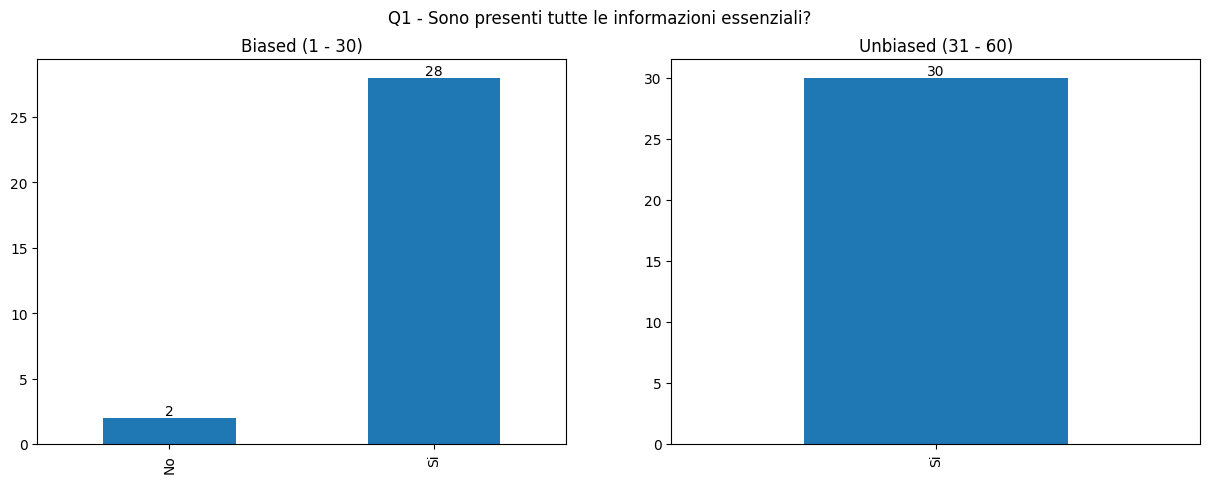

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Q1 - Sono presenti tutte le informazioni essenziali?')

df1 = final_df[final_df['paragraph_index'] <= 30]['q1'].map({True: 'Si', False: 'No'})
df2 = final_df[final_df['paragraph_index'] > 30]['q1'].map({True: 'Si', False: 'No'})

df1.value_counts().sort_index().plot(kind="bar", ax=axs[0])
df2.value_counts().sort_index().plot(kind="bar", ax=axs[1])

add_labels(axs[0], offset=0.2)
add_labels(axs[1], offset=0.2)

axs[0].set_title('Biased (1 - 30)')
axs[1].set_title('Unbiased (31 - 60)')

axs[0].set_xlabel('')
axs[1].set_xlabel('')

plt.show()

# Q2 - Sono presenti parti/informazioni superflue che sono state eliminate?

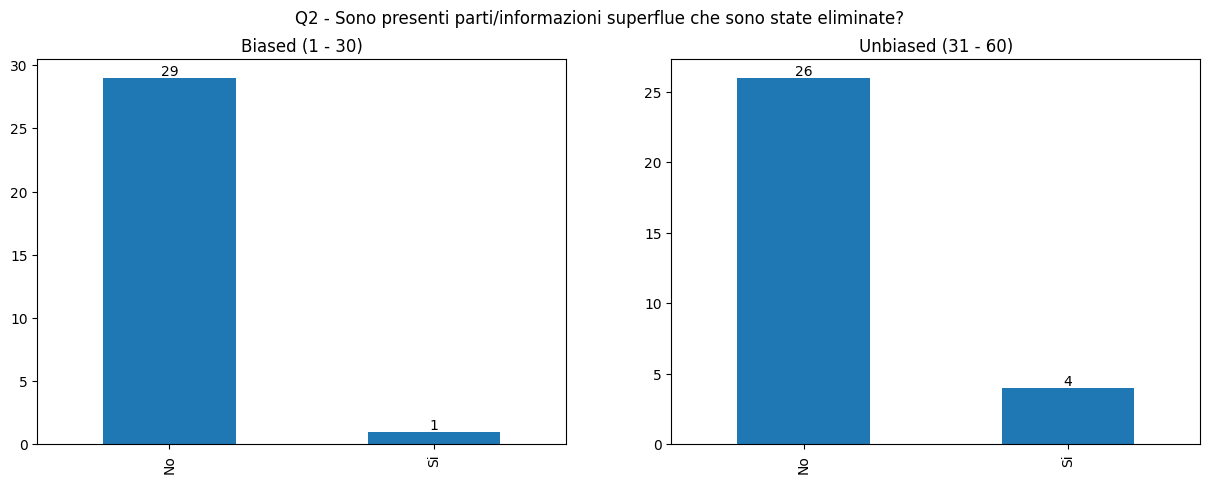

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Q2 - Sono presenti parti/informazioni superflue che sono state eliminate?')

df1 = final_df[final_df['paragraph_index'] <= 30]['q2'].map({True: 'Si', False: 'No'})
df2 = final_df[final_df['paragraph_index'] > 30]['q2'].map({True: 'Si', False: 'No'})

df1.value_counts().sort_index().plot(kind="bar", ax=axs[0])
df2.value_counts().sort_index().plot(kind="bar", ax=axs[1])

add_labels(axs[0], offset=0.2)
add_labels(axs[1], offset=0.2)

axs[0].set_title('Biased (1 - 30)')
axs[1].set_title('Unbiased (31 - 60)')

axs[0].set_xlabel('')
axs[1].set_xlabel('')

plt.show()

# Q3 - Sono presenti parole (tecnicismi) con effetto giuridico che sono state cancellate creando problematicità al testo semplificato?

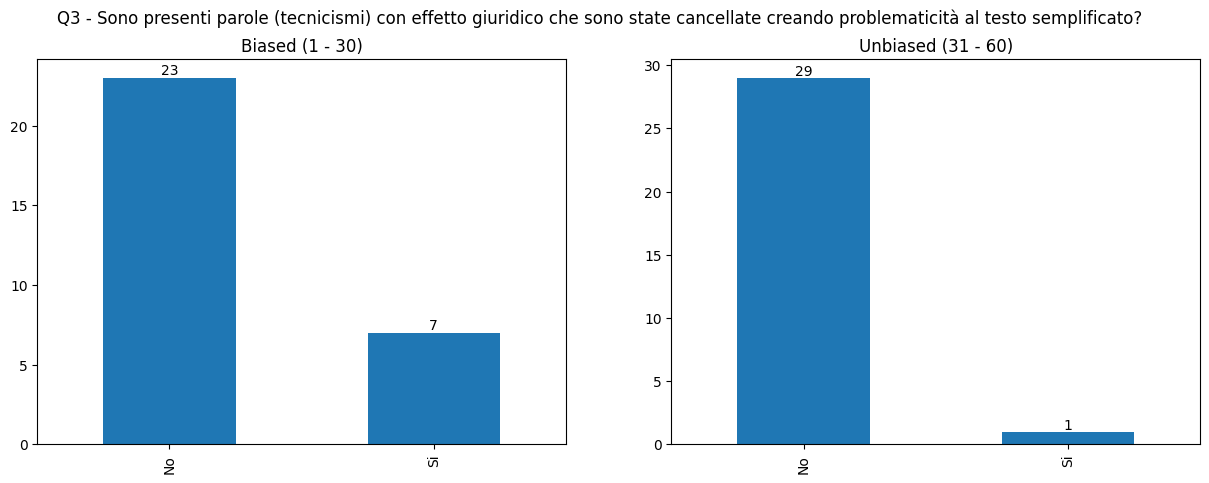

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Q3 - Sono presenti parole (tecnicismi) con effetto giuridico che sono state cancellate creando problematicità al testo semplificato?')

df1 = final_df[final_df['paragraph_index'] <= 30]['q3'].map({True: 'Si', False: 'No'})
df2 = final_df[final_df['paragraph_index'] > 30]['q3'].map({True: 'Si', False: 'No'})

df1.value_counts().sort_index().plot(kind="bar", ax=axs[0])
df2.value_counts().sort_index().plot(kind="bar", ax=axs[1])

add_labels(axs[0], offset=0.2)
add_labels(axs[1], offset=0.2)

axs[0].set_title('Biased (1 - 30)')
axs[1].set_title('Unbiased (31 - 60)')

axs[0].set_xlabel('')
axs[1].set_xlabel('')

plt.show()

# Q3.1

r1

In [7]:
for a in final_df.dropna(subset='q3_1').to_dict(orient='records'):
  print(f'====== {a["paragraph_index"]} ======')
  print(a['original_text'])
  print('-------------')
  print(a['simplified_text'])
  print('-------------')
  print(a['q3_1'])
  print()

====== 9 ======
Si rende necessario adeguare il livello dell'Assistenza Distrettuale, come definito dal Capo III, art. 3-20, del DPCM LEA 12 gennaio 2017e dal Decreto 23 maggio 2022, n. 77 art. 1 allegato 1 e allegato 2 prescrittivo. 
-------------
È necessario migliorare il livello dell'Assistenza Distrettuale secondo quanto stabilito dal Capo III, articoli 3-20, del DPCM LEA del 12 gennaio 2017 e dal Decreto del 23 maggio 2022, numero 77, articolo 1, allegato 1 e allegato 2.
-------------
avrei lasciato l'aggettivo prescritto in riferimento all'allegato 2 della norma indicata perché distingue l'allegato 1 che, al contrario, ha natura descrittiva.

====== 11 ======
Per il raggiungimento delle finalità sopra richiamate sono stati individuati i quattro obiettivi strategici di seguito elencati:
- Garantire e stimolare il miglioramento continuo della qualità dell'assistenza
- Favorire la prossimità e l'appropriatezza
- Valorizzare il governo del rischio clinico
- Assicurare l'equità e pro

# Q4 - Sono stati introdotti errori interpretativi?

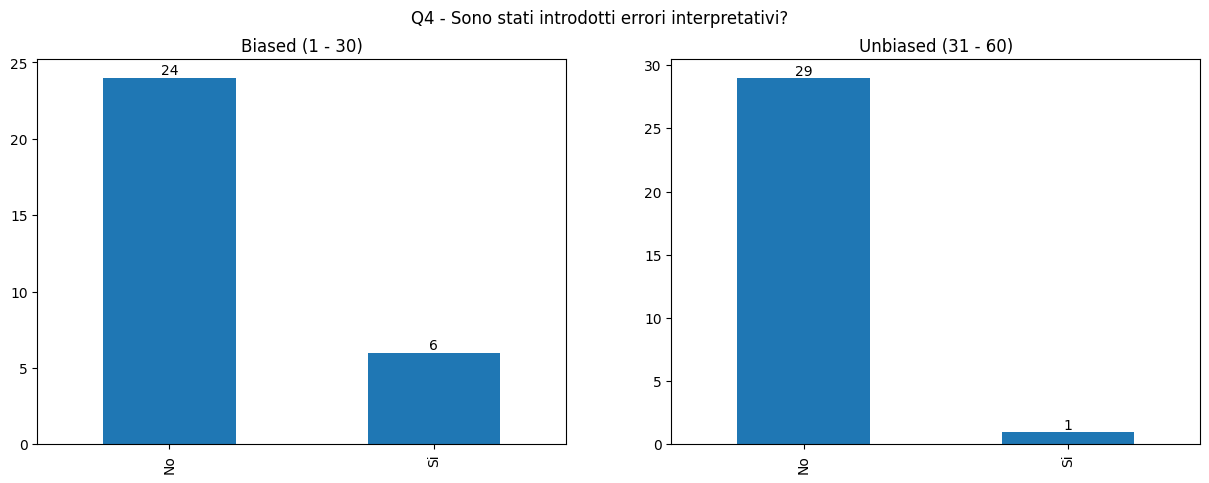

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Q4 - Sono stati introdotti errori interpretativi?')

df1 = final_df[final_df['paragraph_index'] <= 30]['q4'].map({True: 'Si', False: 'No'})
df2 = final_df[final_df['paragraph_index'] > 30]['q4'].map({True: 'Si', False: 'No'})

df1.value_counts().sort_index().plot(kind="bar", ax=axs[0])
df2.value_counts().sort_index().plot(kind="bar", ax=axs[1])

add_labels(axs[0], offset=0.2)
add_labels(axs[1], offset=0.2)

axs[0].set_title('Biased (1 - 30)')
axs[1].set_title('Unbiased (31 - 60)')

axs[0].set_xlabel('')
axs[1].set_xlabel('')

plt.show()

# Q5

In [9]:
for a in final_df.dropna(subset='q5').to_dict(orient='records'):
  print(f'====== {a["paragraph_index"]} ======')
  print(a['original_text'])
  print('-------------')
  print(a['simplified_text'])
  print('-------------')
  print(a['q5'])
  print()

====== 1 ======
Le presenti Linee programmatiche definiscono gli indirizzi per la programmazione regionale, stabilendo le linee di azione e organizzative prioritarie per il Sistema sanitario regionale attuazione della riforma territoriale ai sensi del DM 23 maggio 2022, n. 77. Tali linee programmatiche, che devono essere declinate nella programmazione attuativa aziendale non si intendono esaustive delle attività e dei servizi che devono essere garantiti in adempimento della normativa statale e regionale, ma indicano le priorità individuate dalla Regione. Il presente documento indirizza le funzionalità, i modelli organizzativi e di servizio, i mix di professionalità necessari per il concreto avvio delle Case di Comunità (CdC), Ospedali di Comunità (OdC), Centrali Operative Territoriali (COT), Infermiere di Famiglia e Comunità (IFeC), Assistenza Domiciliare Integrata (ADI) e tutte le altre componenti rilevanti per lo sviluppo dei servizi territoriali per promuovere la prevenzione primari